In [2]:
import warnings
warnings.filterwarnings("ignore")
import pyart
import numpy as np
import os
import glob
import datetime
import pymeso.vortex
from pymeso import llsd
import wradlib as wrl
import matplotlib.pyplot as plt

In [41]:
data_dir = "/depot/dawson29/data/Projects/PERiLS/obsdata/2022/NEXRAD/IOP2/KPAH/KPAH20220330_232422_V06.nc"

In [42]:
radar = pyart.io.read(data_dir)

In [43]:
display = pyart.graph.RadarDisplay(radar)

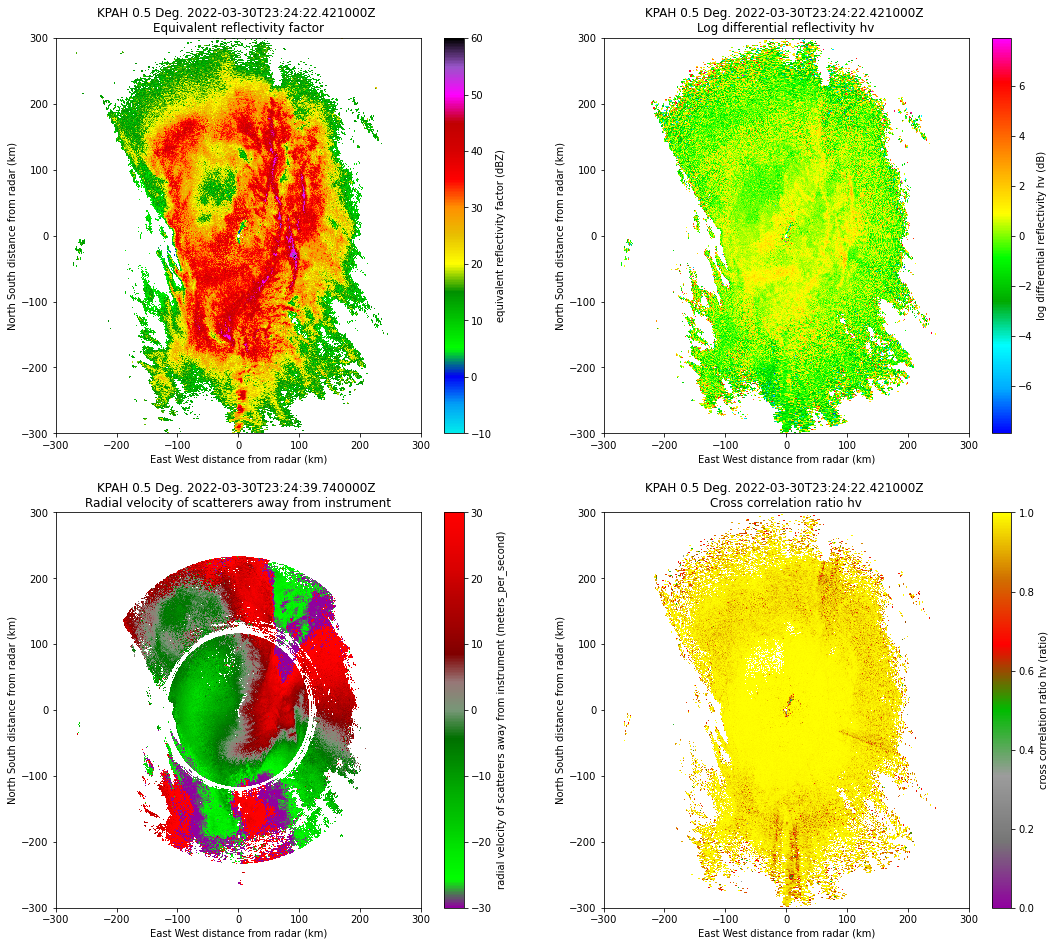

In [44]:
fig = plt.figure(figsize=[18,16])
ax1 = plt.subplot(221)
display.plot_ppi("reflectivity",sweep=0,vmin=-10,vmax=60, cmap="pyart_NWSRef", ax=ax1)
ax2 = plt.subplot(222)
display.plot("differential_reflectivity",sweep=0,vmin=-7.9,vmax=7.9, cmap="pyart_RefDiff", 
                     ax=ax2)
ax3 = plt.subplot(223)
display.plot("velocity",sweep=1,vmin=-30,vmax=30, cmap="pyart_NWSVel",ax=ax3)
ax4 = plt.subplot(224)
display.plot("cross_correlation_ratio",sweep=0,vmin=0,vmax=1, cmap="pyart_NWS_SPW",ax=ax4)
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_xlim(-300, 300)
    ax.set_ylim(-300, 300)

In [45]:
radar.sweep_mode

{'long_name': 'Sweep mode',
 'units': 'unitless',
 'standard_name': 'sweep_mode',
 'comment': 'Options are: "sector", "coplane", "rhi", "vertical_pointing", "idle", "azimuth_surveillance", "elevation_surveillance", "sunscan", "pointing", "manual_ppi", "manual_rhi"',
 'data': masked_array(
   data=[[b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l', b'a', b'n', b'c', b'e', --,
          --, --, --, --, --, --, --, --, --, --, --],
         [b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l', b'a', b'n', b'c', b'e', --,
          --, --, --, --, --, --, --, --, --, --, --],
         [b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l', b'a', b'n', b'c', b'e', --,
          --, --, --, --, --, --, --, --, --, --, --],
         [b'a', b'z', b'i', b'm', b'u', b't', b'h', b'_', b's', b'u',
          b'r', b'v', b'e', b'i', b'l', b'l

In [46]:
##################
#Example of running and plotting of llsd function from PyMeso
##################
#import standard libs
import time
from pymeso import llsd
from matplotlib.pyplot import cm
import matplotlib.colors as colors

#function to dealiase the Doppler velocity
def dealiase(radar, vel_name):
    #check to see if radar object has nyquist velocity
    try: 
        gatefilter = pyart.correct.GateFilter(radar)
        corr_vel   = pyart.correct.dealias_region_based(
            radar, vel_field=vel_name, keep_original=False, gatefilter = gatefilter)
        radar.add_field(vel_name, corr_vel, True)
    except:
        None
#dealiase Doppler field
dealiase(radar,'velocity')

#call the llsd function form llsd.py
start_time = time.time()
az_shear_meta = llsd.main(radar,'reflectivity','velocity')
print("LLSD COMPUTE --- %s seconds ---" % (time.time() - start_time))
radar.add_field('azi_shear', az_shear_meta, replace_existing=True)

#define constants as required for plotting
tilt = 1

#plot reflectivity, Doppler velocity and llsd azimuthal shear using pyart
display = pyart.graph.RadarDisplay(radar)

LLSD COMPUTE --- 4.432805776596069 seconds ---


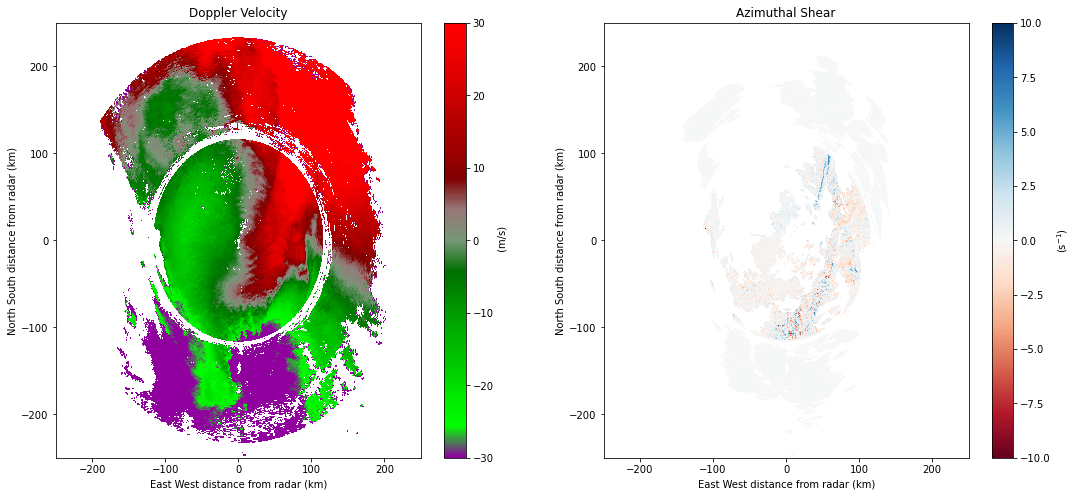

In [50]:
f = plt.figure(figsize=[18,8])
ax1 = plt.subplot(121)
display.plot('velocity', tilt, title='Doppler Velocity',vmin=-30, vmax=30.0, colorbar_label=' (m/s)',
                       cmap = pyart.graph.cm.NWSVel,ax=ax1)
ax2 = plt.subplot(122)
display.plot('azi_shear',tilt,title='Azimuthal Shear',vmin=-10, vmax=10, colorbar_label='(s$^{-1}$)',
                       cmap=cm.RdBu,ax=ax2)
for ax in [ax1,ax2]:
    ax.set_xlim(-250, 250)
    ax.set_ylim(-250, 250)